# Introduction

As the world is moving towards ubiquitous digitization in the financial sector, the risk of fraud grows faster than ever, posing significant challenges to both financial instutions and customers. As a result, the need for robust fraud detection systems capable of identifying and mitigating fraudulent activities is more important than ever.

## Project Description
This notebook aims to provide a comprehensive exploratory data analysis on the Bank Fraud Detection Base dataset, published at NeurIPS 2022.

## Dataset Description
The dataset is available at https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data.

This synthetic tabular dataset comprises 1M instances, where each instance represents a credit card application. The dataset contains 31 features and a corresponding binary target variable indicating whether the application is fraudulent or not. The features cover various information associated with the applicant or the application. The dataset contains a combination of numerical and categorical features, and there are no missing values in the dataset. The dataset is highly imbalanced, with only ~1% of the instances labeled as fraudulent. The dataset is also generated based off real-world data to protect the privacy of potential applicants.

A detailed description of the dataset can be found on https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf.

# Imports and Data Loading

In [17]:
# Import libraries
import numpy as np

# Set the maximum number of columns and rows to display
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
import matplotlib.colors

# Better visualizations for colorblind readers
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('colorblind')

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [18]:
# Load the dataset
total_df = pd.read_csv('./Data/Base.csv')

# Define features and target
X = total_df.drop(columns='fraud_bool')
y = total_df['fraud_bool']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train = pd.concat([X_train, y_train], axis=1).copy()
test = pd.concat([X_test, y_test], axis=1).copy()

# Exploratory Data Analysis

## Target

In [19]:
print(f"Target: 'fraud_bool'")
print(f"Data type: {y_train.dtype}")
print(f"Unique values: {y_train.dropna().unique()}")
print(f"NaN values: {y_train.isna().sum()}")
print(f"Null values: {y_train.isnull().sum()}")

# Get count and distribution
count_distribution = y_train.value_counts()
proportion_distribution = y_train.value_counts(normalize=True)

print("\nCount and Distribution of 'fraud_bool':")
for value in count_distribution.index:
    count = count_distribution[value]
    proportion = proportion_distribution[value]
    print(f"Value {value}: {count} ({proportion:.2%})")

Target: 'fraud_bool'
Data type: int64
Unique values: [0 1]
NaN values: 0
Null values: 0

Count and Distribution of 'fraud_bool':
Value 0: 791177 (98.90%)
Value 1: 8823 (1.10%)


## Features

In [20]:
# Shows the first 5 observations of the training data
X_train.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
39111,0.7,0.229712,-1,63,50,0.024720,50.674001,AA,1305,12764.326278,6418.672862,5998.527006,7,13,CA,97,1,BC,0,1,24,1,1500.0,0,INTERNET,3.580550,linux,0,1,0,0
822700,0.2,0.928428,199,24,70,0.014153,15.631407,AA,833,9717.635327,6342.913428,4814.609668,1,5,CC,144,0,BD,1,0,20,0,500.0,0,INTERNET,7.087779,other,1,1,0,6
914415,0.1,0.658630,95,2,40,0.045801,-1.410133,AB,237,2201.833206,2753.815567,3076.055489,14,5,CA,87,1,BC,1,1,26,0,200.0,0,INTERNET,0.547804,other,1,1,0,7
581307,0.8,0.774858,-1,122,30,0.005569,-0.539938,AB,895,5377.254660,4551.599208,4223.827504,0,5,CA,206,0,BE,0,1,1,1,500.0,0,INTERNET,4.671407,other,1,1,0,4
603136,0.9,0.993460,103,9,20,0.010832,-0.501067,AB,4105,7428.775954,4872.930234,4250.760719,14,11,CB,114,1,BC,1,1,1,1,200.0,0,INTERNET,9.293206,linux,0,1,0,4


In [21]:
X_train.shape

(800000, 31)

In [22]:
X_train.dtypes

income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                       int64
proposed_credit_limit           

In [23]:
num_feats = X_train.select_dtypes(include='number').columns
cat_feats = X_train.select_dtypes(exclude='number').columns

thresh = 13

cont_feats = []
disc_feats = []

for feat in num_feats:
    if total_df[feat].nunique() >= thresh:
        cont_feats.append(feat)
    else:
        disc_feats.append(feat)

print("Total Features:", X_train.shape[1])
print("\nContinuous Features ({}): {}".format(len(cont_feats), cont_feats))
print("\nDiscrete Features ({}): {}".format(len(disc_feats), disc_feats))
print("\nCategorical Features ({}): {}".format(len(cat_feats), cat_feats))

Total Features: 31

Continuous Features (14): ['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes']

Discrete Features (12): ['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']

Categorical Features (5): Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')


In [24]:
# The datasheet details that the following categories can be negative to represent missing values
cols_missing= [
    'prev_address_months_count', 'current_address_months_count',
    'bank_months_count', 'session_length_in_minutes',
    'device_distinct_emails_8w', 'intended_balcon_amount'
]

# Replace all negative values with NaN
X_train[cols_missing] = X_train[cols_missing].mask(X_train[cols_missing] < 0, np.nan)

# Calculate missing values percentage and display as a table
missing_values = (X_train.isna().sum() / len(X_train) * 100).loc[lambda x: x > 0]
missing_table = pd.DataFrame(missing_values, columns=["Missing %"]).sort_values(by="Missing %")

# Print the missing values table
print("Missing Values Table:\n", missing_table)


Missing Values Table:
                               Missing %
device_distinct_emails_8w      0.036250
session_length_in_minutes      0.202875
current_address_months_count   0.423875
bank_months_count             25.325500
prev_address_months_count     71.315625
intended_balcon_amount        74.233500


## In-depth Descriptive Statistics

In [25]:
def feature_analysis(feat, X_train, y_train, cont_feats, disc_feats):
    def display_summary(summary):
        return display(summary)

    # Summary for continuous features
    def cont_summary(feat):
        columns = ['dtype', 'count', 'unique', 'top_value_counts', 'missing_count',
                   'missing_percentage', 'mean', 'std', 'min', 'median', 'max']
        summary = pd.DataFrame(index=[feat], columns=columns, dtype=float)
        col = X_train[feat].copy()
        summary.loc[feat, ['count', 'mean', 'std', 'min', 'median', 'max']] = col.describe(percentiles=[.5]).values.transpose()
        summary.loc[feat, 'unique'] = col.nunique()
        summary.loc[feat, 'missing_count'] = col.isnull().sum()
        summary.loc[feat, 'missing_percentage'] = col.isnull().sum() / len(col) * 100
        int_cols = ['count', 'unique', 'missing_count']
        summary[int_cols] = summary[int_cols].astype(int)
        summary = summary.round(2).astype(str)
        value_counts = X_train[feat].value_counts().head(3)
        value_counts.index = value_counts.index.astype(float).to_numpy().round(2)
        summary.loc[feat, 'top_value_counts'] = str(value_counts.to_dict())
        summary.loc[feat, 'dtype'] = col.dtypes
        return display_summary(summary)

    # Plots for continuous features
    def cont_plots(feat, bins='auto'):
        # Sample the data to a smaller size for resource-intensive plots
        sample_size = min(10000, len(X_train))
        X_train_sample = X_train.sample(n=sample_size, random_state=42)
        y_train_sample = y_train.loc[X_train_sample.index]

        n_cols = 4
        fig, axes = plt.subplots(1, n_cols, figsize=(6.4 * n_cols, 4.8))
        sns.histplot(data=X_train, x=feat, bins=bins, ax=axes[0])
        sns.boxplot(data=X_train, x=feat, y=y_train, ax=axes[1], orient='h')
        sns.kdeplot(data=X_train, x=feat, hue=y_train, fill=True, common_norm=False, ax=axes[2])
        sns.violinplot(data=X_train_sample, x=feat, y=y_train_sample, ax=axes[3], orient='h')
        axes[0].title.set_text('Histogram')
        axes[1].title.set_text('Box Plot')
        axes[2].title.set_text('KDE Plot')
        axes[3].title.set_text('Violin Plot')
        fig.tight_layout()
        plt.show()

    # Summary for discrete features
    def disc_summary(feat):
        columns = ['dtype', 'count', 'unique', 'missing_count', 'missing_percentage', 'mean', 'std', 'min', 'median', 'max', 'cv']
        summary = pd.DataFrame(index=[feat], columns=columns, dtype=float)
        col = X_train[feat].copy()
        summary.loc[feat, ['count', 'mean', 'std', 'min', 'median', 'max']] = col.describe(percentiles=[.5]).values.transpose()
        summary.loc[feat, 'unique'] = col.nunique()
        summary.loc[feat, 'cv'] = np.NaN if not col.mean() else col.std() / col.mean()
        summary.loc[feat, 'missing_count'] = col.isnull().sum()
        summary.loc[feat, 'missing_percentage'] = col.isnull().sum() / len(col) * 100
        int_cols = ['count', 'unique', 'missing_count']
        summary[int_cols] = summary[int_cols].astype(int)
        summary = summary.round(2).astype(str)
        summary.loc[feat, 'dtype'] = col.dtypes
        return display_summary(summary)

    # Plots for discrete features
    def disc_plots(feat):
        col = X_train[feat].copy()
        sample_size = min(10000, len(X_train))
        X_train_sample = X_train.sample(n=sample_size, random_state=42)
        y_train_sample = y_train.loc[X_train_sample.index]

        n_cols = 2
        fig, axes = plt.subplots(1, n_cols, figsize=(6.4 * n_cols, 4.8))
        unique_values = col.dropna().unique()
        unique_values.sort()
        val_counts = col.dropna().value_counts()
        val_counts = val_counts.reindex(unique_values)
        val_counts_pct = val_counts / len(col) * 100
        sns.countplot(x=col, order=unique_values, ax=axes[0])
        axes[0].xaxis.grid(False)
        lp_thresh = 1
        for i, p in enumerate(axes[0].patches):
            pct = val_counts_pct.iloc[i]
            axes[0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')
            if pct < lp_thresh:
                axes[0].annotate(val_counts.iloc[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', color='red')
        df = pd.concat([X_train, y_train], axis=1).groupby(feat)[y_train.name].mean() * 100
        df = df.reindex(unique_values)
        sns.barplot(x=df.index, y=df.values, ax=axes[1])
        axes[1].set_ylabel('Fraud %')
        axes[1].xaxis.grid(False)
        axes[0].title.set_text('Count Plot')
        axes[1].title.set_text('Bar Plot')
        fig.tight_layout()
        plt.show()

    # Summary for categorical features
    def cat_summary(feat):
        columns = ['dtype', 'count', 'unique', 'missing_count', 'missing_percentage']
        summary = pd.DataFrame(index=[feat], columns=columns, dtype=float)
        col = X_train[feat].copy()
        summary.loc[feat, 'count'] = col.count()
        summary.loc[feat, 'unique'] = col.nunique()
        summary.loc[feat, 'missing_count'] = col.isnull().sum()
        summary.loc[feat, 'missing_percentage'] = col.isnull().sum() / len(col) * 100
        int_cols = ['count', 'unique', 'missing_count']
        summary[int_cols] = summary[int_cols].astype(int)
        summary = summary.round(2).astype(str)
        summary.loc[feat, 'dtype'] = col.dtypes
        return display_summary(summary)

    # Plots for categorical features
    def cat_plots(feat):
        col = X_train[feat].copy()
        sample_size = min(10000, len(X_train))
        X_train_sample = X_train.sample(n=sample_size, random_state=42)
        y_train_sample = y_train.loc[X_train_sample.index]

        n_cols = 2
        fig, axes = plt.subplots(1, n_cols, figsize=(6.4 * n_cols, 4.8))
        val_counts = col.dropna().value_counts()
        unique_values = val_counts.index
        sns.countplot(x=col, order=unique_values, ax=axes[0])
        axes[0].xaxis.grid(False)
        val_counts_pct = val_counts / len(col) * 100
        lp_thresh = 1
        for i, p in enumerate(axes[0].patches):
            pct = val_counts_pct.iloc[i]
            axes[0].annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')
            if pct < lp_thresh:
                axes[0].annotate(val_counts.iloc[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 10), textcoords='offset points', color='red')
        df = pd.concat([X_train, y_train], axis=1).groupby(feat)[y_train.name].mean() * 100
        sns.barplot(x=df.index, y=df.values, order=unique_values, ax=axes[1])
        axes[1].set_ylabel('Fraud %')
        axes[1].xaxis.grid(False)
        axes[0].title.set_text('Count Plot')
        axes[1].title.set_text('Bar Plot')
        fig.tight_layout()
        plt.show()

    # Plot for missing flag associated with a feature
    def missing_flag_plot(feat):
        col = X_train[feat].isnull().astype(int)
        if not col.sum():
            return
        df = (pd.concat([col, y_train], axis=1).groupby(feat).mean() * 100).reset_index()
        cols = [f'MISSING_{feat}', 'Fraud %']
        df.columns = cols
        fig = plt.figure(figsize=(6.4, 4.8))
        ax = sns.barplot(data=df, x=cols[0], y=cols[1])
        fig.tight_layout()
        plt.show()

    # Joint Plot for analyzing relationships between features
    if feat in cont_feats:
        cont_summary(feat)
        cont_plots(feat)
    elif feat in disc_feats:
        disc_summary(feat)
        disc_plots(feat)
    else:
        cat_summary(feat)
        cat_plots(feat)
    missing_flag_plot(feat)
    return

 Feature: 'name_email_similarity'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
name_email_similarity,float64,800000,799289,"{0.23: 2, 0.26: 2, 0.78: 2}",0,0.0,0.49,0.29,0.0,0.49,1.0


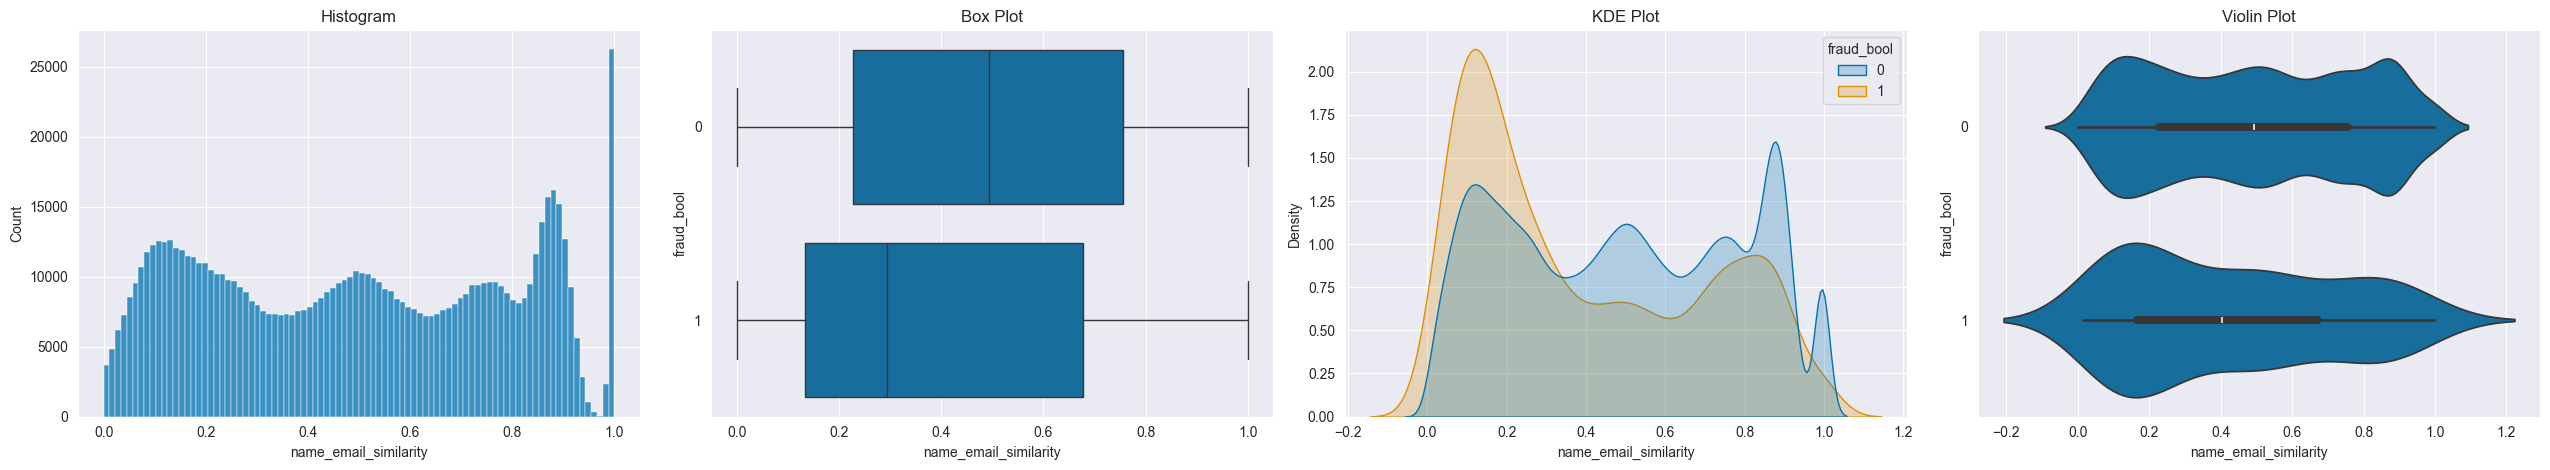

--------------------------------------------- 

 Feature: 'prev_address_months_count'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
prev_address_months_count,float64,229475,373,"{11.0: 9204, 28.0: 8246, 29.0: 8079}",570525,71.32,60.71,63.55,5.0,34.0,383.0


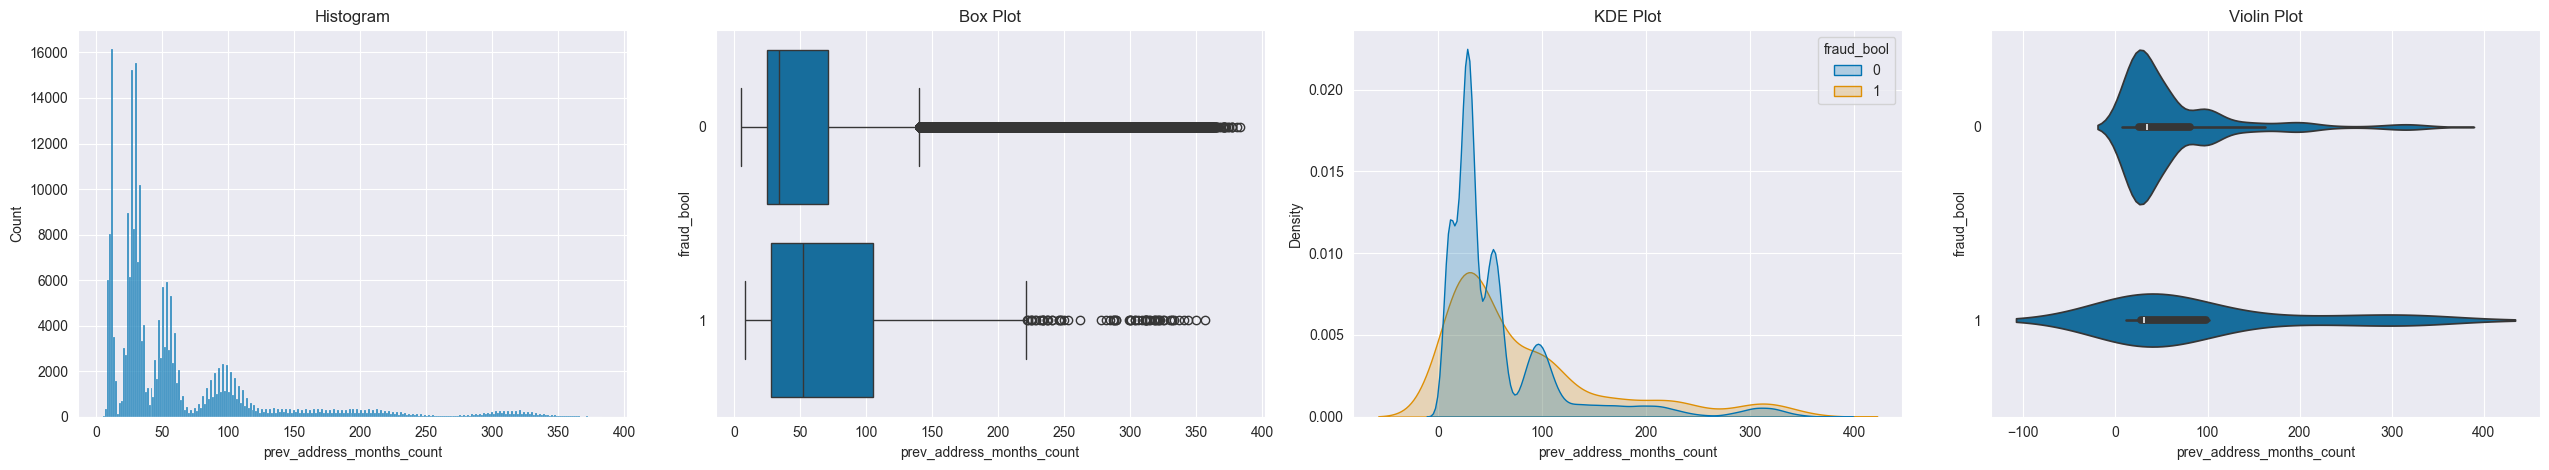

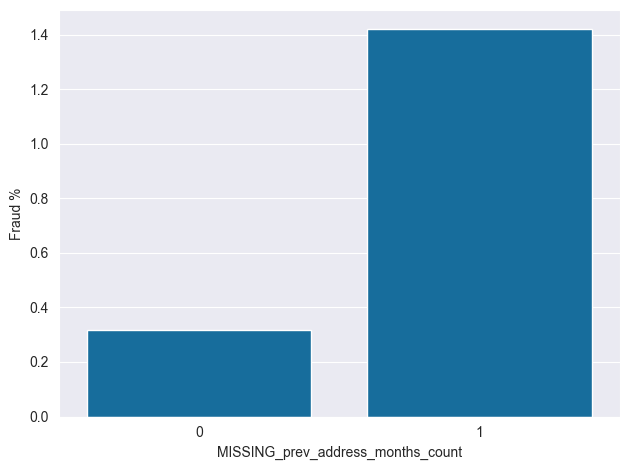

--------------------------------------------- 

 Feature: 'current_address_months_count'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
current_address_months_count,float64,796609,420,"{6.0: 13001, 7.0: 12952, 8.0: 12874}",3391,0.42,86.99,88.39,0.0,53.0,428.0


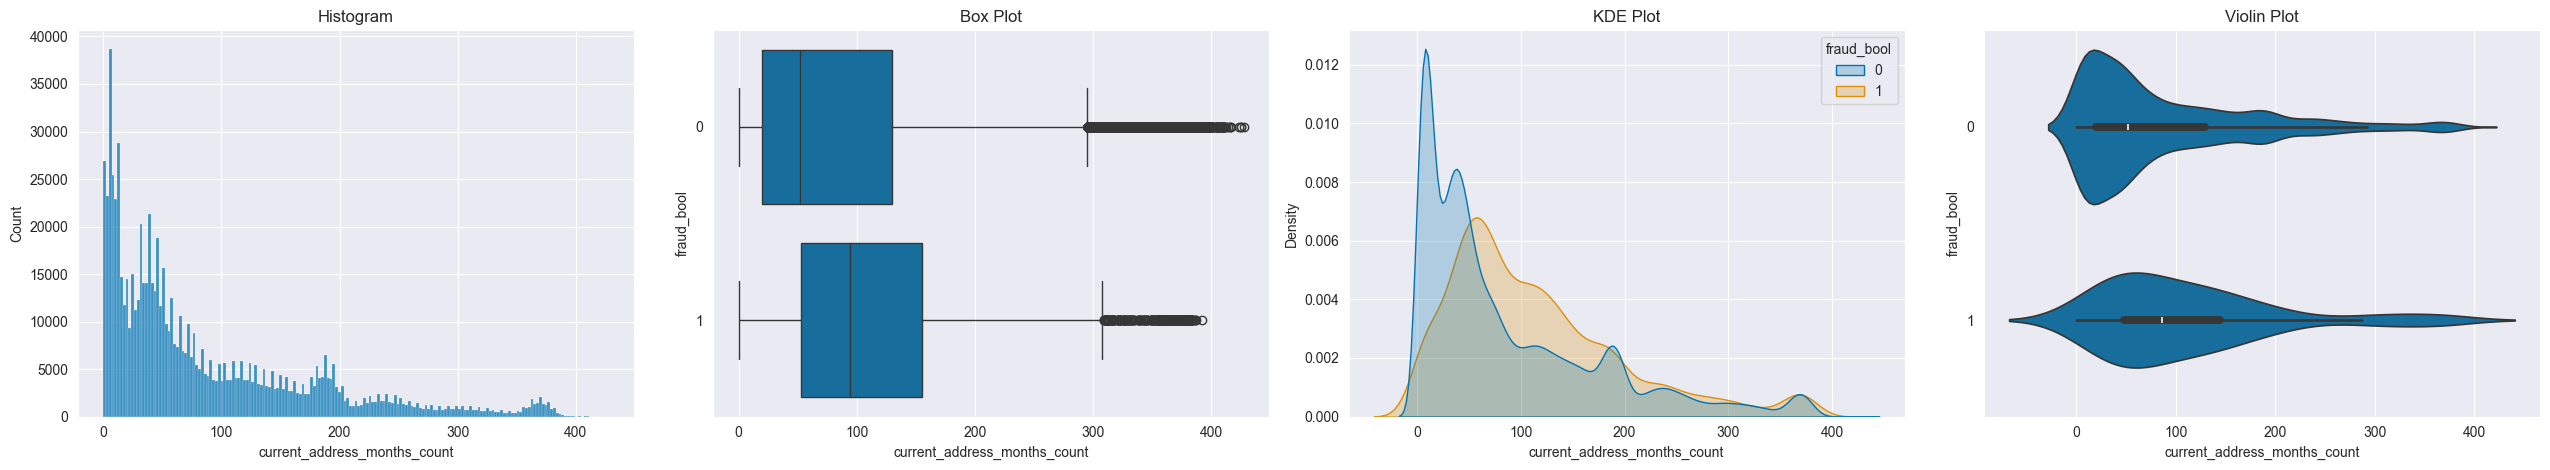

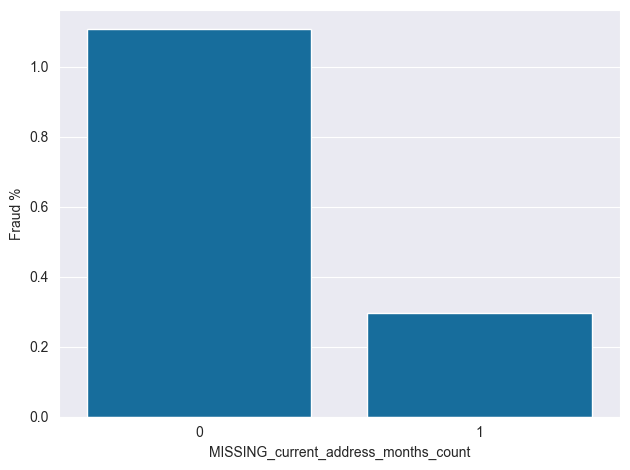

--------------------------------------------- 

 Feature: 'days_since_request'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
days_since_request,float64,800000,793121,"{0.01: 3, 0.02: 3}",0,0.0,1.02,5.38,0.0,0.02,78.46


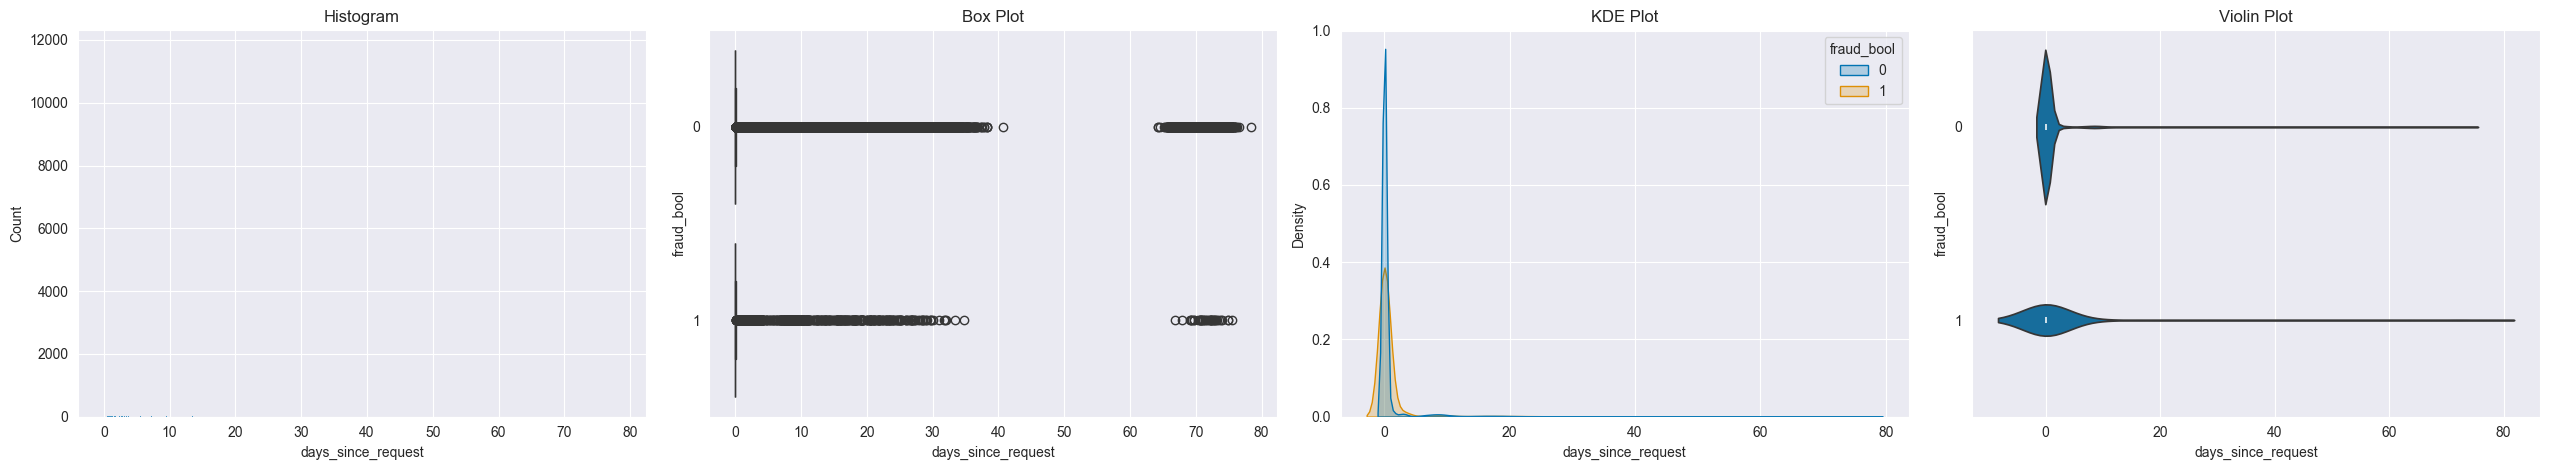

--------------------------------------------- 

 Feature: 'intended_balcon_amount'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
intended_balcon_amount,float64,206132,205910,"{39.07: 2, 36.04: 2, 15.63: 2}",593868,74.23,36.57,23.22,0.0,32.45,112.96


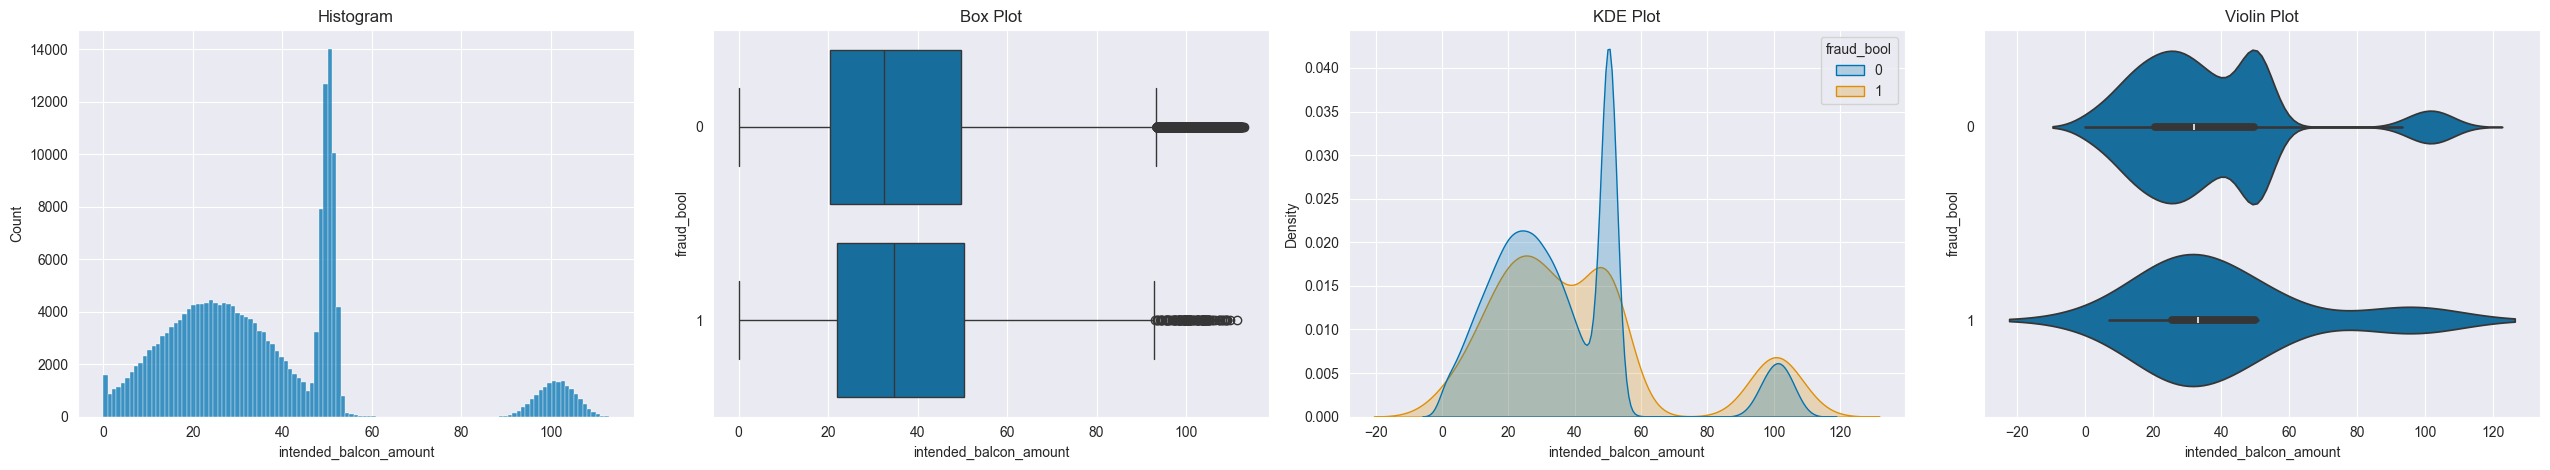

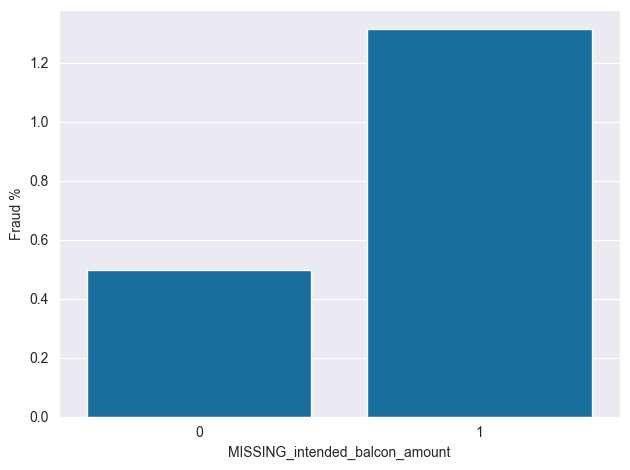

--------------------------------------------- 

 Feature: 'zip_count_4w'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
zip_count_4w,int64,800000,6268,"{1062.0: 645, 1020.0: 644, 941.0: 622}",0,0.0,1572.77,1005.23,1.0,1263.0,6700.0


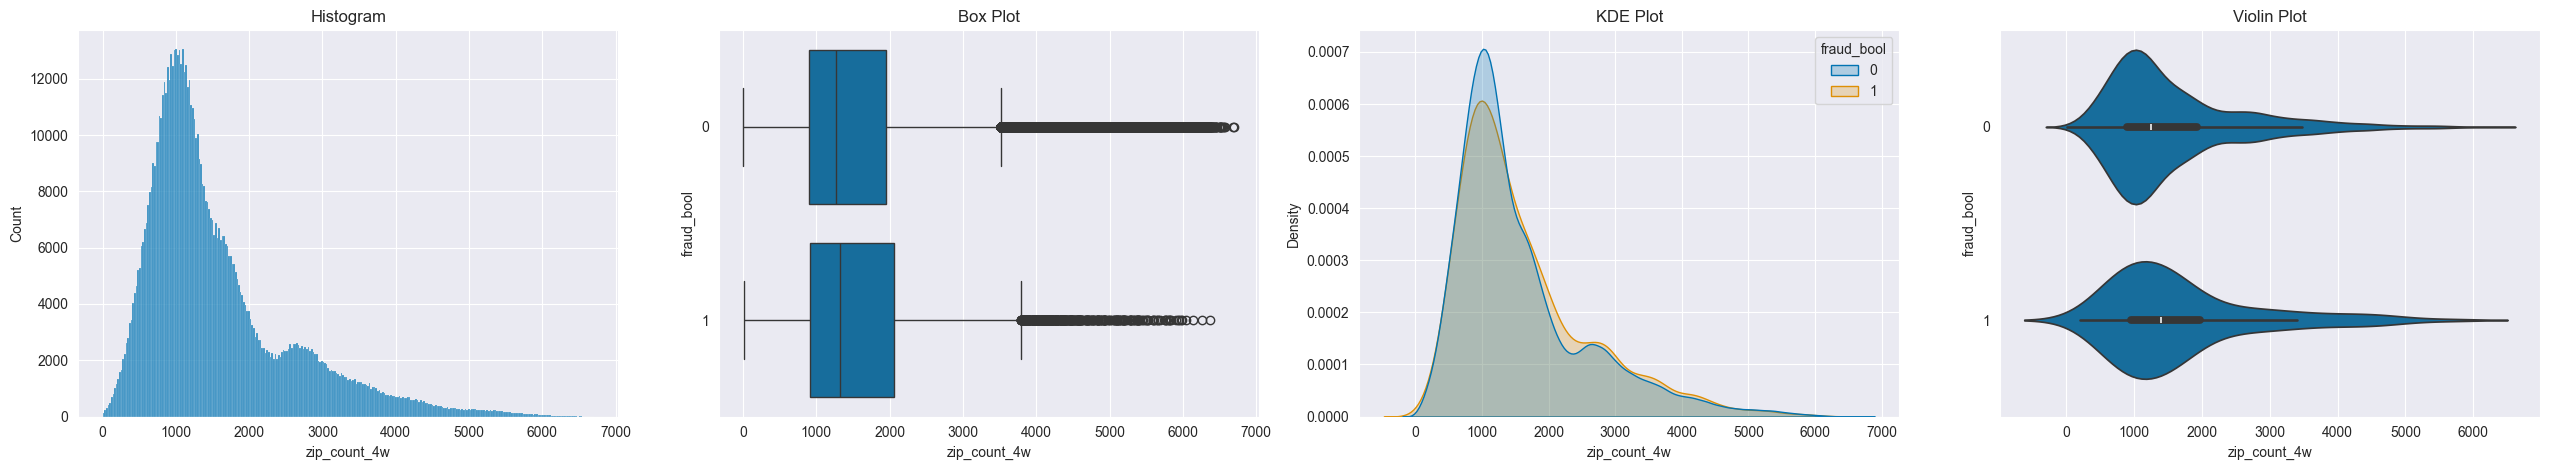

--------------------------------------------- 

 Feature: 'velocity_6h'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
velocity_6h,float64,800000,799150,"{2985.72: 2, 5900.35: 2, 8769.6: 2}",0,0.0,5664.02,3009.68,-170.6,5316.3,16715.57


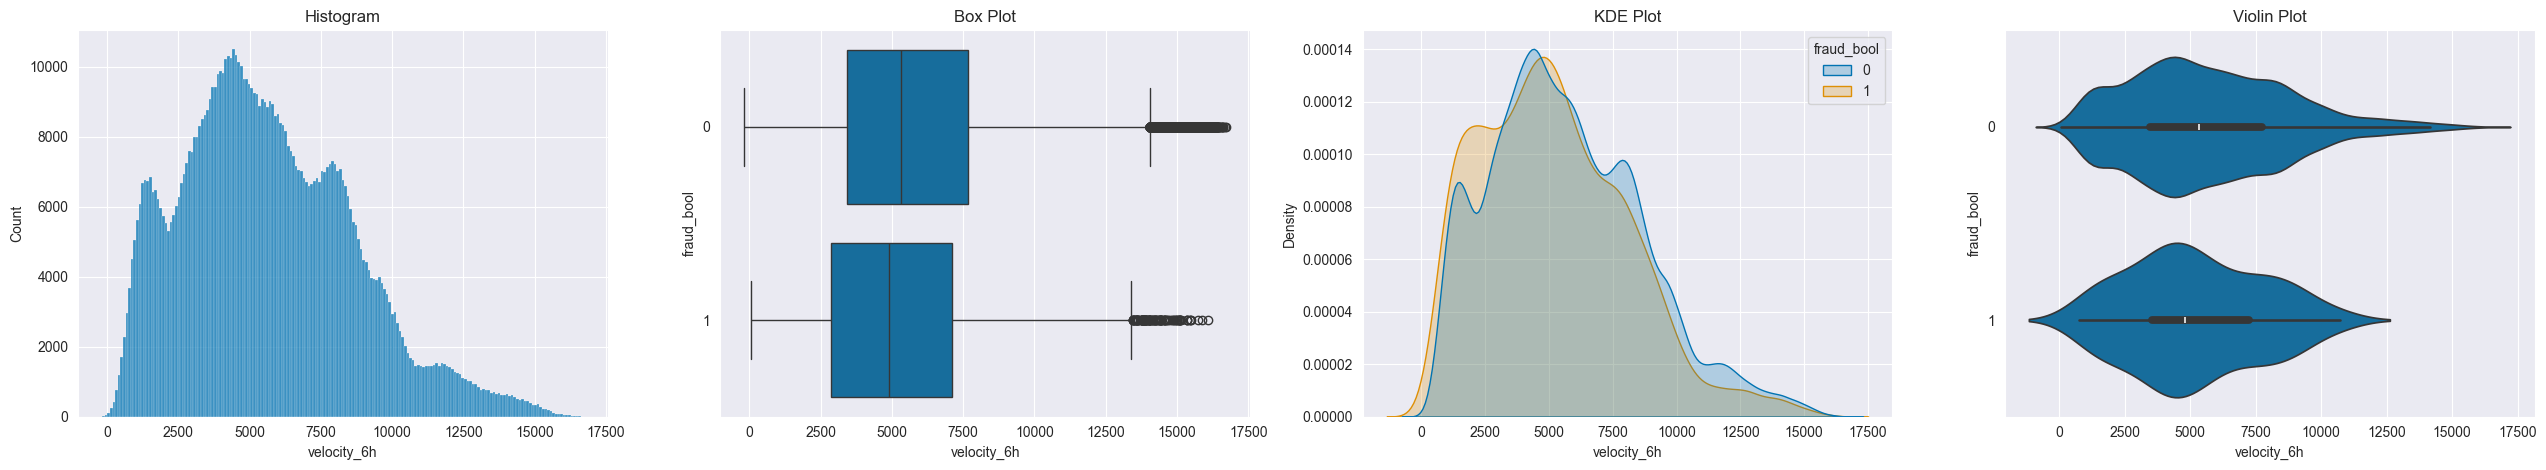

--------------------------------------------- 

 Feature: 'velocity_24h'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
velocity_24h,float64,800000,799310,"{5082.33: 3, 4667.86: 3, 3906.42: 3}",0,0.0,4770.23,1479.5,1320.28,4750.8,9506.9


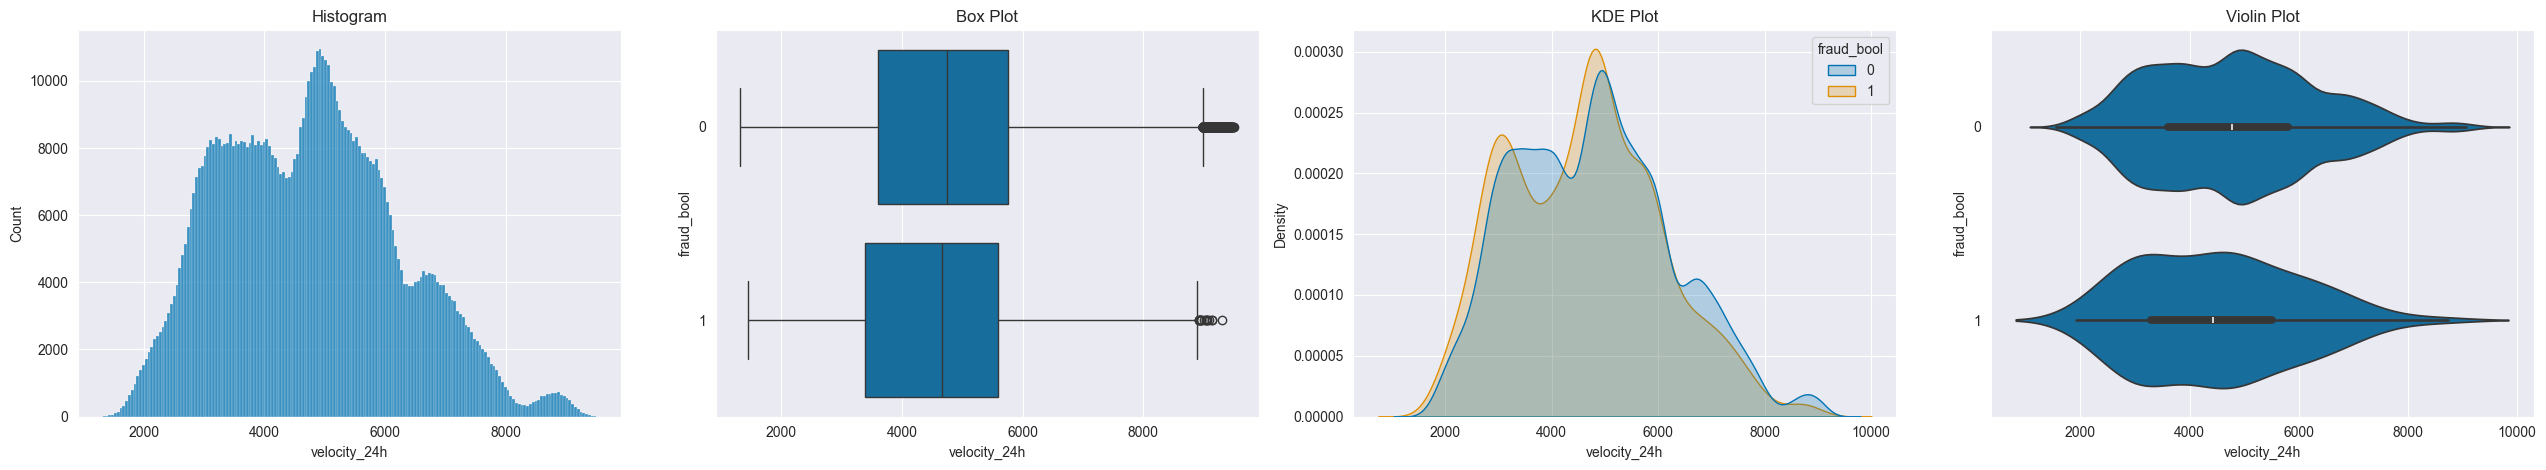

--------------------------------------------- 

 Feature: 'velocity_4w'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
velocity_4w,float64,800000,798908,"{5466.87: 3, 3137.5: 2, 4334.23: 2}",0,0.0,4856.0,919.62,2825.75,4913.54,6994.76


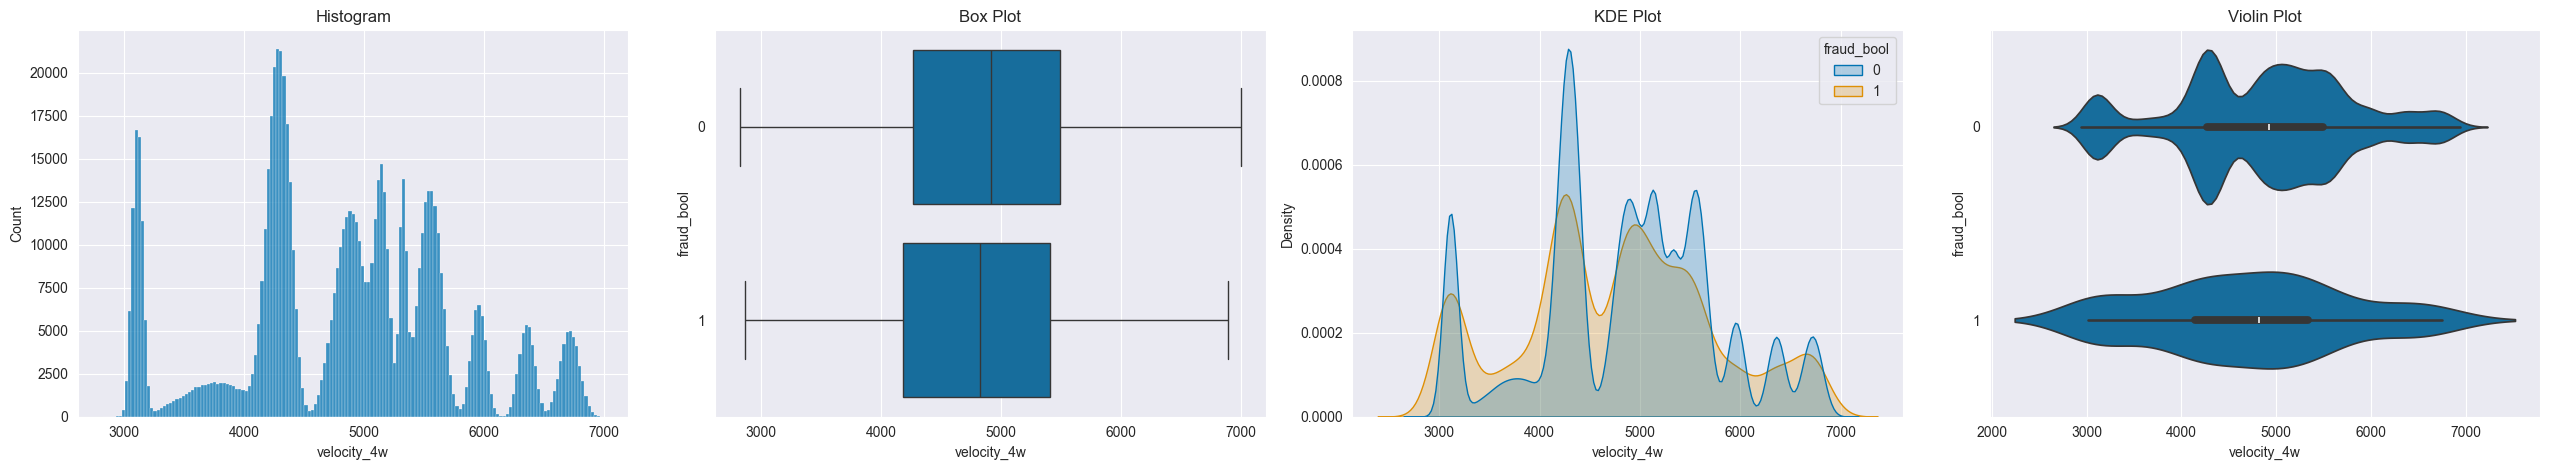

--------------------------------------------- 

 Feature: 'bank_branch_count_8w'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
bank_branch_count_8w,int64,800000,2318,"{1.0: 119074, 0.0: 115535, 2.0: 46310}",0,0.0,184.3,459.48,0.0,9.0,2385.0


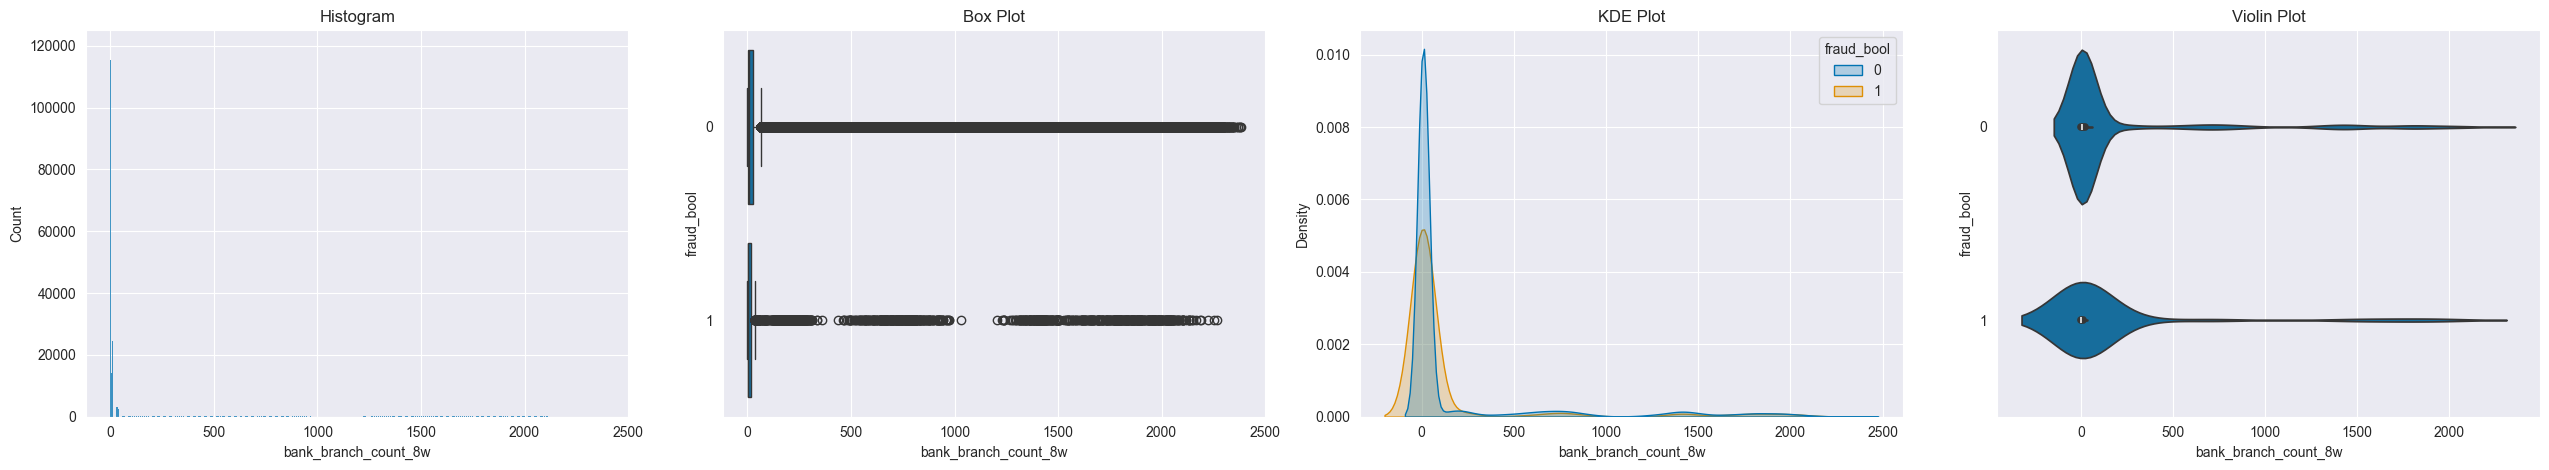

--------------------------------------------- 

 Feature: 'date_of_birth_distinct_emails_4w'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
date_of_birth_distinct_emails_4w,int64,800000,40,"{7.0: 66534, 5.0: 64588, 8.0: 63581}",0,0.0,9.5,5.04,0.0,9.0,39.0


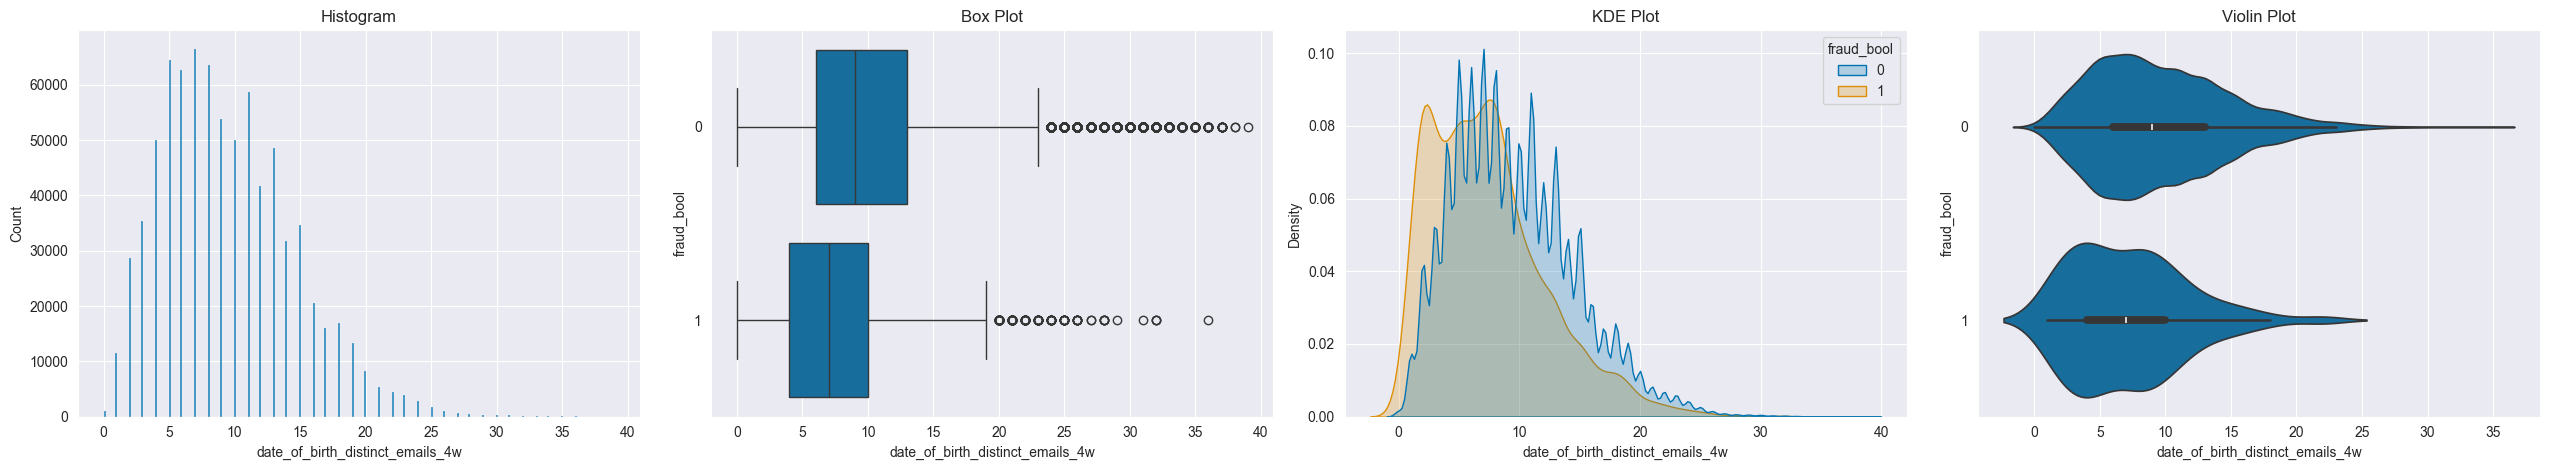

--------------------------------------------- 

 Feature: 'credit_risk_score'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
credit_risk_score,int64,800000,550,"{116.0: 5436, 115.0: 5417, 110.0: 5402}",0,0.0,131.01,69.68,-170.0,122.0,389.0


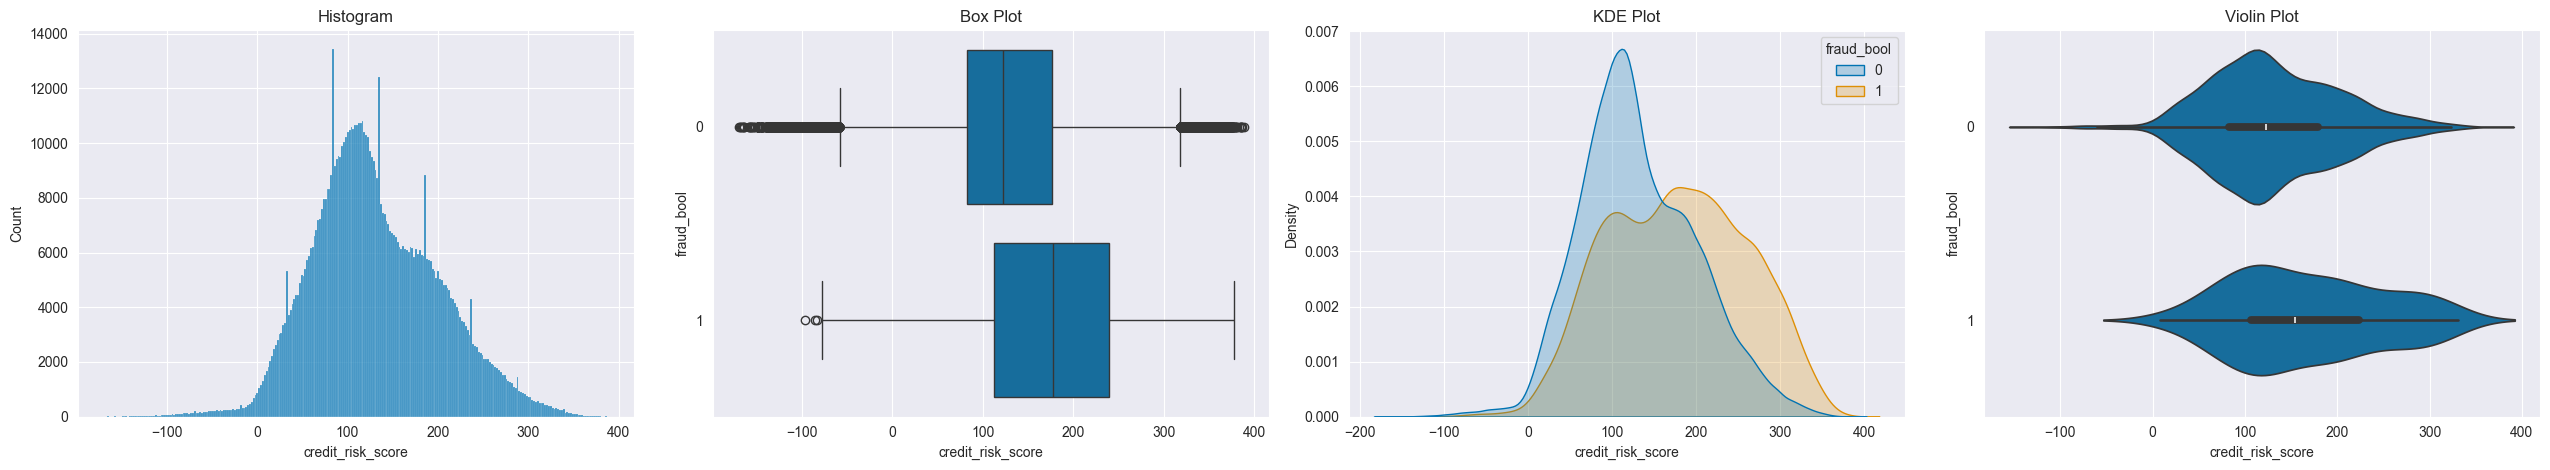

--------------------------------------------- 

 Feature: 'bank_months_count'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
bank_months_count,float64,597396,32,"{1.0: 155878, 28.0: 64172, 15.0: 47326}",202604,25.33,14.87,11.53,1.0,15.0,32.0


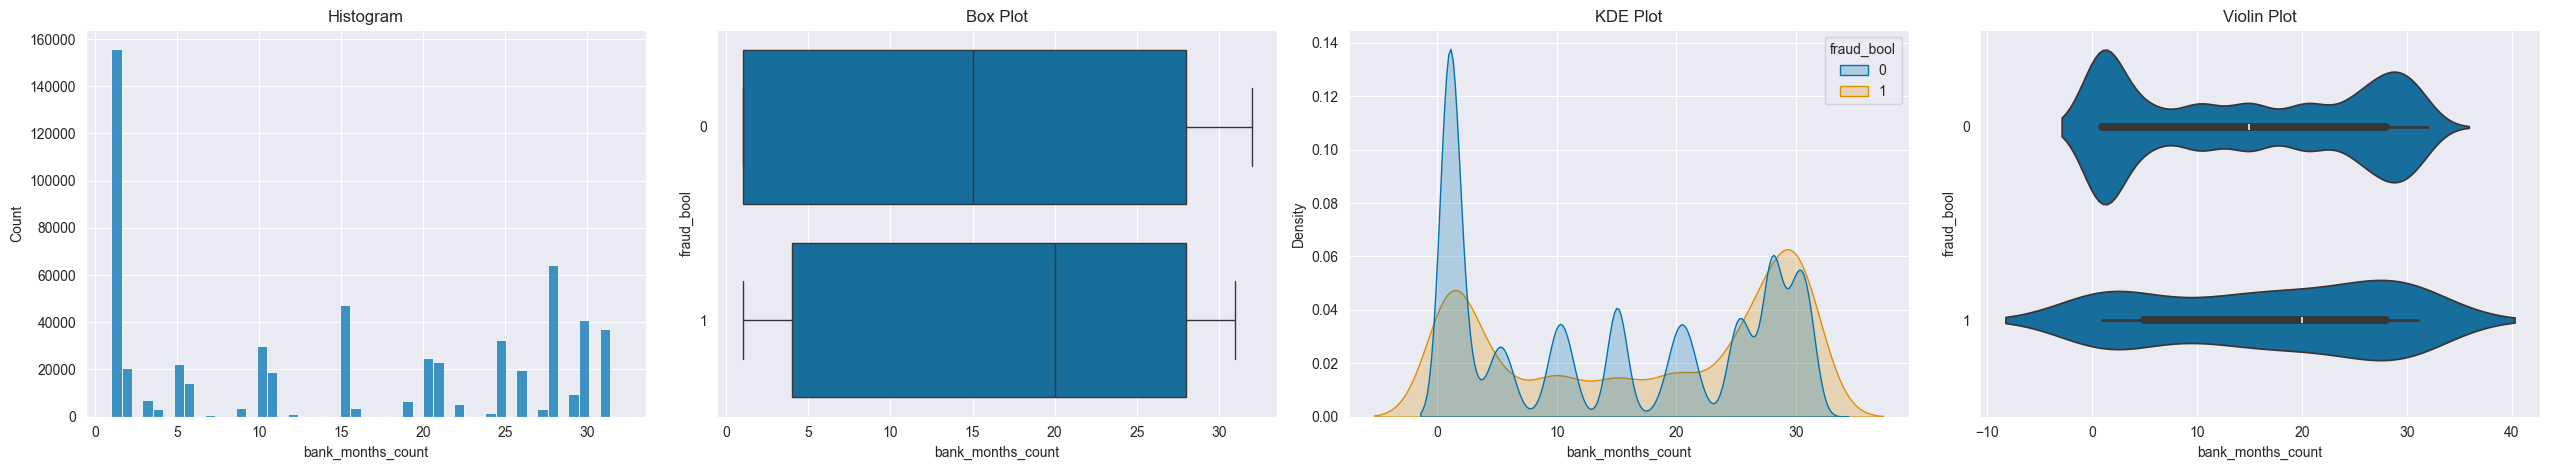

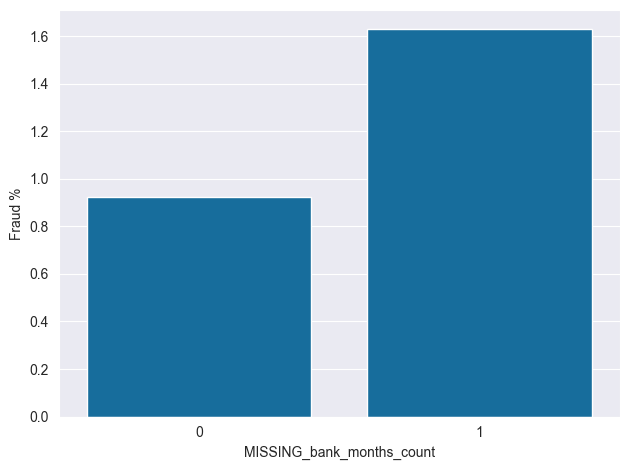

--------------------------------------------- 

 Feature: 'session_length_in_minutes'



,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max
session_length_in_minutes,float64,798377,796390,"{4.74: 3, 4.19: 3, 4.64: 3}",1623,0.2,7.57,8.04,0.0,5.12,85.9


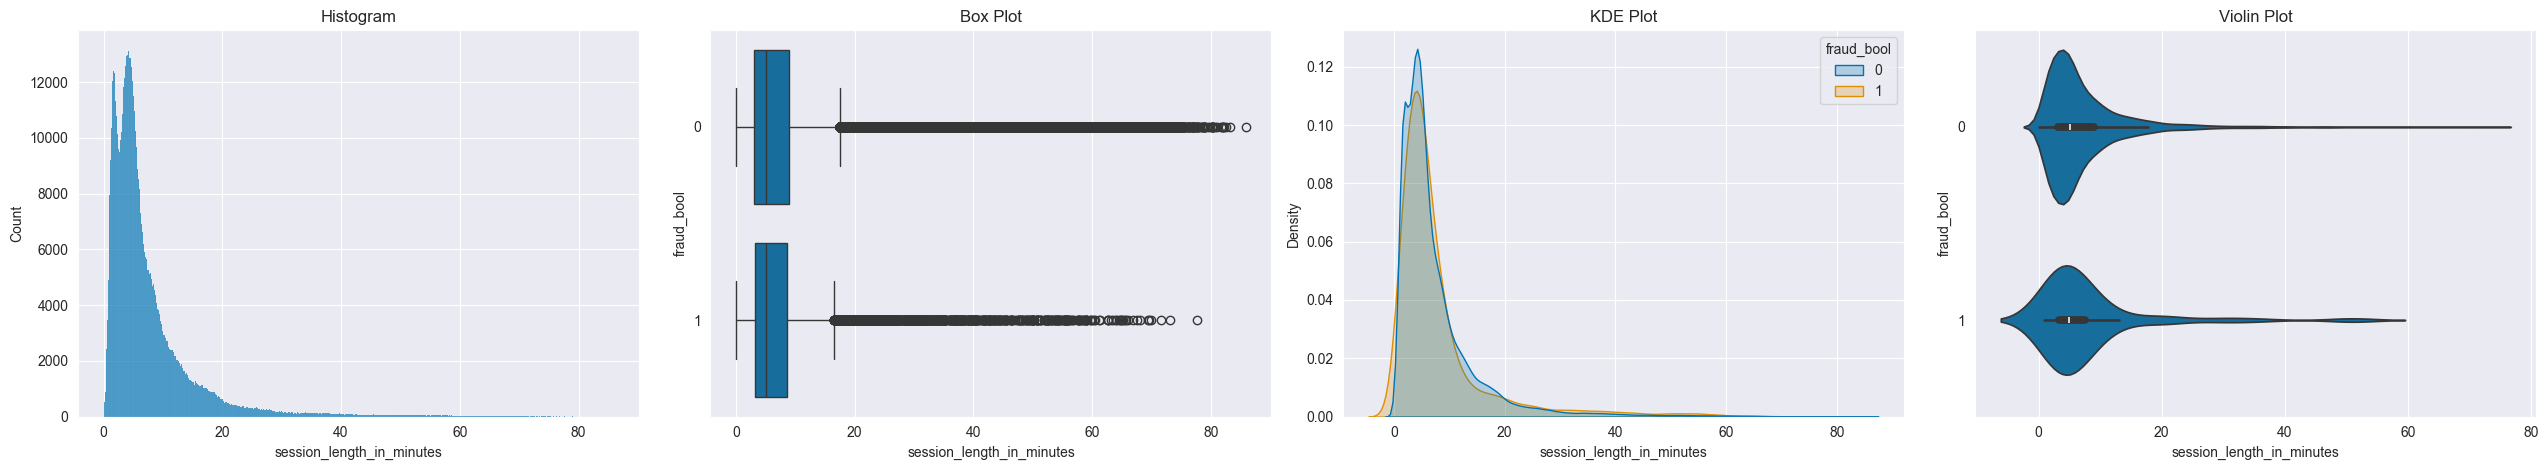

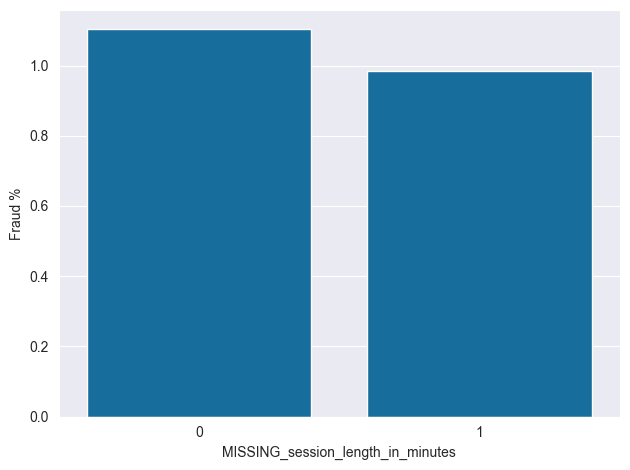

--------------------------------------------- 



In [26]:
for feat in cont_feats:
    print(f"\033[1m Feature:\033[0m '{feat}'\n")
    feature_analysis(feat, X_train, y_train, cont_feats, disc_feats)
    print('-'*45, '\n')


In [27]:
# for feat in disc_feats:
#     print(f"\033[1m Feature:\033[0m '{feat}'\n")
#     feature_analysis(feat, X_train, y_train, cont_feats, disc_feats)
#     print('-'*45, '\n')

In [28]:
# for feat in cat_feats:
#     print(f"\033[1m Feature:\033[0m '{feat}'\n")
#     feature_analysis(feat, X_train, y_train, cont_feats, disc_feats)
#     print('-'*45, '\n')
